

# Clustering-Master Template

This is a master template for implementing and working on several clustering techniques. 

## Content

* [1. Introduction](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.3.Data Transformation](#3.2)  
* [5.Evaluate Algorithms and Models](#5)        
    * [5.1. k-Means Clustering](#5.1)
        * [5.1.1 Finding right number of clusters](#5.1.1)
    * [5.2. Hierarchial Clustering (Agglomerative Clustering)](#5.2)
        * [5.2.1 Visualising the hierarchy](#5.2.1) 
    * [5.3. Affinity Propagation Clustering](#5.3)
        * [5.3.1 Visualising the cluster](#5.2.1) 
    * [5.4. DBSCAN Clustering](#5.4)
        * [5.3.1 Finding the right parameters](#5.4.1) 

<a id='0'></a>
# 1. Introduction

Clustering can serve to better understand the data through the lens of categories learned from continuous variables. It also permits automatically categorizing new objects according to the learned criteria. Alternatively, clusters can be used to represent groups as prototypes, using e.g. the midpoint of a cluster as the best representatives of learned grouping. 

In this jupyter notebook, we will look at the following clustering techniques:
1. K-means
2. Hierarchical Clustering (Agglomerative Clustering)
3. Affinity Propagation 



<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime

#Import Model Packages 
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold


#Other Helper Packages and functions
import matplotlib.ticker as ticker
from itertools import cycle

<a id='1.2'></a>
## 2.2. Loading the Data

In [2]:
# load dataset
dataset = read_csv('Data_MasterTemplate.csv',index_col=0)

In [3]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [5]:
# shape
dataset.shape

(4804, 30)

In [6]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,NaN,...,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,NaN,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,NaN,...,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,NaN,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,NaN,...,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,NaN,44.503437,21.097421
2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,NaN,...,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,NaN,45.126952,20.527220
2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,NaN,...,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,NaN,48.535033,21.051805


In [7]:
# describe data
set_option('display.precision', 3)
dataset.describe()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
count,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,363.000,...,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,2741.000,4804.000,4804.000
mean,86.769,49.659,49.107,85.482,56.697,61.735,21.653,24.984,46.368,64.897,...,23.724,20.737,49.960,55.961,62.209,64.418,27.193,53.323,50.767,41.697
std,53.942,22.564,55.020,79.085,34.663,31.714,10.074,10.611,32.733,5.768,...,20.988,7.630,19.769,34.644,32.627,62.920,11.973,37.647,17.040,19.937
min,25.140,8.713,0.828,17.463,9.247,17.566,6.842,11.699,11.018,49.090,...,2.595,8.041,16.204,13.287,14.521,5.175,11.210,9.846,30.748,17.317
25%,51.192,34.079,3.900,37.407,26.335,31.820,14.910,15.420,22.044,62.250,...,8.037,15.031,35.414,29.907,34.328,23.498,17.434,18.959,38.062,27.704
50%,63.514,42.274,23.316,58.437,53.048,56.942,18.578,20.563,29.521,66.586,...,14.147,18.643,46.735,39.824,55.715,42.924,21.556,45.207,42.782,32.706
75%,122.906,66.816,84.007,112.996,76.488,91.688,24.650,34.927,75.833,69.143,...,36.545,25.403,68.135,80.767,92.557,73.171,38.996,76.966,65.076,58.165
max,251.981,112.421,231.260,411.110,166.832,128.680,63.698,50.400,117.973,75.261,...,85.300,45.841,98.030,146.564,141.280,286.330,60.016,150.525,107.010,90.188


<a id='2.2'></a>
## 3.2. Data Visualization

Taking a look at the correlation. More detailed look at the data will be performed after implementing the Dimensionality Reduction Models.

<Axes: title={'center': 'Correlation Matrix'}>

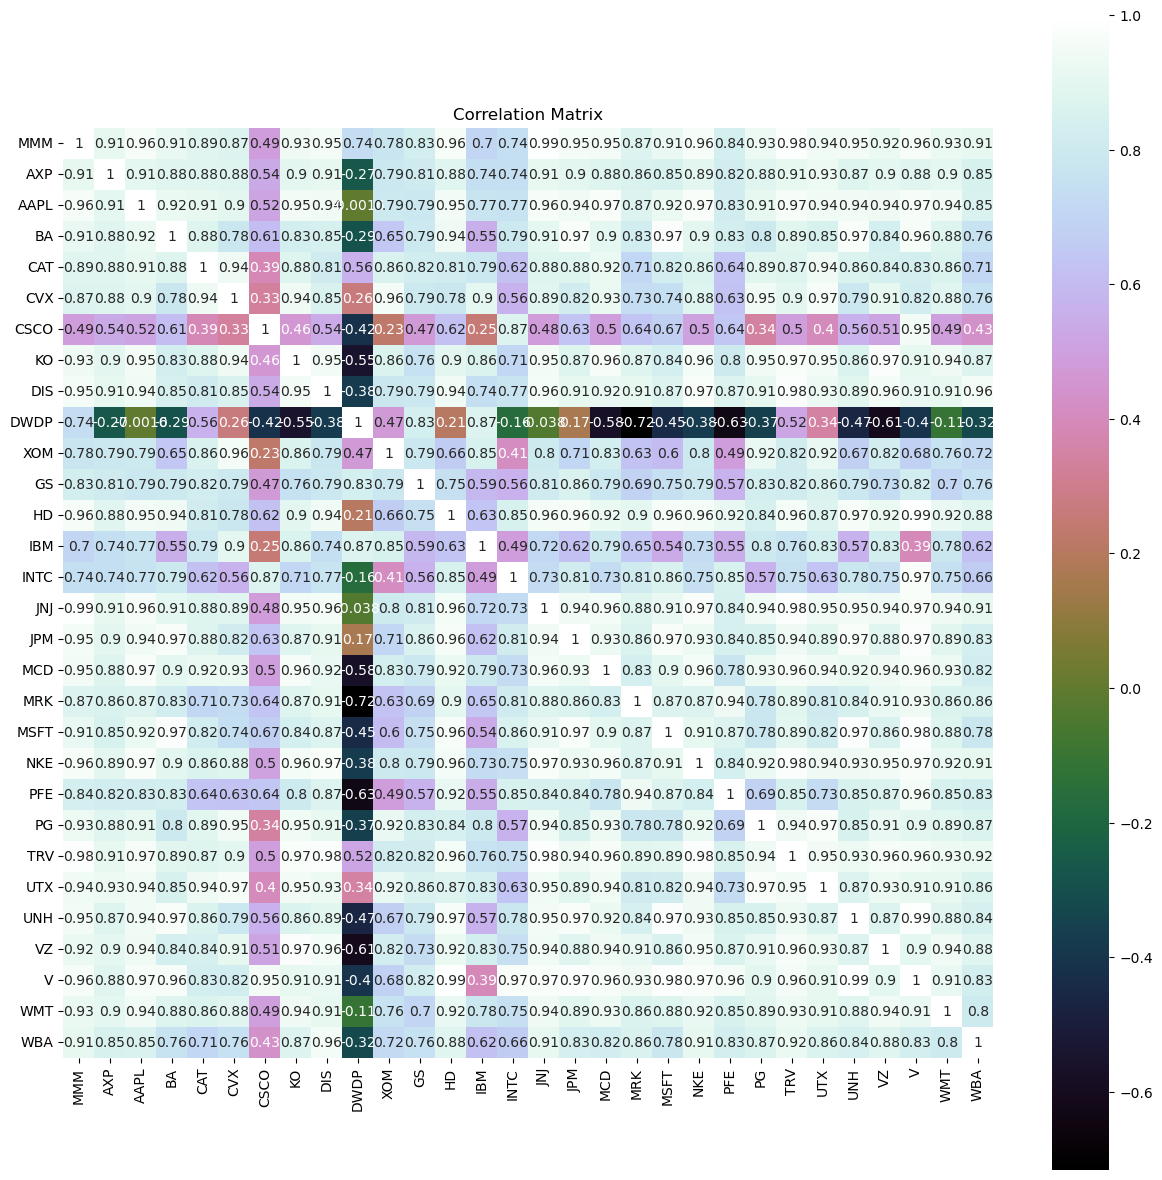

In [8]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<a id='3'></a>
## 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning
Checking for the NAs in the rows, either drop them or fill them with the mean of the column

In [9]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


In this step we getting rid of the columns with more than 30% missing values. 

In [10]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

missing_fractions.head(10)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(4804, 28)

Given that there are null values drop the rown contianing the null values.

In [11]:
# Fill the missing values with the last value available in the dataset. 
dataset=dataset.fillna(method='ffill')

# Drop the rows containing NA
#dataset= dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

#Filling the NAs with the mean of the column.
#dataset['col'] = dataset['col'].fillna(dataset['col'].mean())

dataset.head(2)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847,35.477,3.531,26.65,14.561,21.582,43.004,16.984,23.522,23.862,...,38.135,4.701,16.747,32.228,20.159,21.319,5.841,22.564,47.338,21.713
2000-01-04,28.661,34.134,3.233,26.61,14.372,21.582,40.577,17.041,24.900,23.405,...,36.846,4.445,16.122,31.596,19.890,20.446,5.766,21.834,45.566,20.907


<a id='3.2'></a>
## 4.2. Data Transformation

In this step we preparing the data for the clustering.

In [12]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = dataset.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = dataset.pct_change().std() * np.sqrt(252)
data=returns
#format the data as a numpy array to feed into the K-Means algorithm
#data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

All the variables should be on the same scale before applying PCA, otherwise a feature with large values will dominate the result. Below I use StandardScaler in scikit-learn to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1).

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(data),columns = data.columns, index = data.index)
# summarize transformed data
rescaledDataset.head(2)
X=rescaledDataset
X.head(2)

,Returns,Volatility
MMM,0.059,-1.010
AXP,-0.075,1.115


The parameters to clusters are the indices and the variables used in the clustering are the columns. Hence the data is in the right format to be fed to the clustering algorithms

<a id='4'></a>
# 5. Evaluate Algorithms and Models

We will look at the implementation and visualization of the following clustering techniques. 

1. KMeans
2. Hierarchial clustering
3. Affinity Propagation clustering


<a id='5.1'></a>
## 5.1. K-Means Clustering


k-Means is the most well-known clustering algorithm and was first proposed by Stuart Lloyd at Bell Labs in 1957. 

The algorithm finds K centroids and assigns each data point to exactly one cluster with the goal of minimizing the within-cluster variance (called inertia). It typically uses Euclidean distance but other metrics can also be used. k-Means assumes that clusters are spherical and of equal size and ignores the covariance among features.

The problem is computationally difficult (np-hard) because there are 𝐾N ways to partition the N observations into K clusters. The standard iterative algorithm delivers a local optimum for a given K and proceeds as follows:
1. Randomly define K cluster centers and assign points to nearest centroid
2. Repeat: 
    1. For each cluster, compute the centroid as the average of the features
    2. Assign each observation to the closest centroid
3. Convergence: assignments (or within-cluster variation) don’t change

In [14]:
nclust=6

In [15]:
#Fit with k-means
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

KMeans(n_clusters=6)

In the preceding code, first, we import the KMeans package from scikit-learn and initialize a k-means model. We then fit this model to the data by using the .fit() function. This results in a set of labels as the output. We can extract the labels by using the following code:

In the next step we extract the important parameters from the k-means clustering

In [16]:
centroids, assignments, inertia = k_means.cluster_centers_, k_means.labels_, k_means.inertia_

In [17]:
#Extracting labels 
target_labels = k_means.predict(X)
#Printing the labels
target_labels

array([5, 3, 2, 4, 4, 5, 3, 1, 0, 1, 3, 0, 1, 3, 5, 3, 5, 1, 0, 4, 1, 1,
       0, 0, 4, 1, 1, 0], dtype=int32)

<a id='5.1.1'></a>
### 5.1.1. Finding optimal number of clusters

Typically, two metrics are used to evaluate a K-means model.

1. Sum of square errors (SSE) within clusters
2. Silhouette score.

SSE within clusters is derived by summing up the squared distance between each data point and its closest centroid. The goal is to reduce the error value. The intuition behind this is that we would want the distance of each data point to be as close as possible to the centroid. If the error is small, it would mean that the data points in the same cluster are relatively similar. As the number of centroids (clusters) increase, the error value will decrease. As such we would need to rely on the next metric to ensure that we are not introducing too many centroids (clusters) in the model.

Silhouette score is a measure of how similar the data point is to its own cluster compared to other clusters. The value ranges from -1 (worst score) to 1 (best score). A negative value would mean that data points are wrongly clustered while values near 0 would mean that there are overlapping clusters.

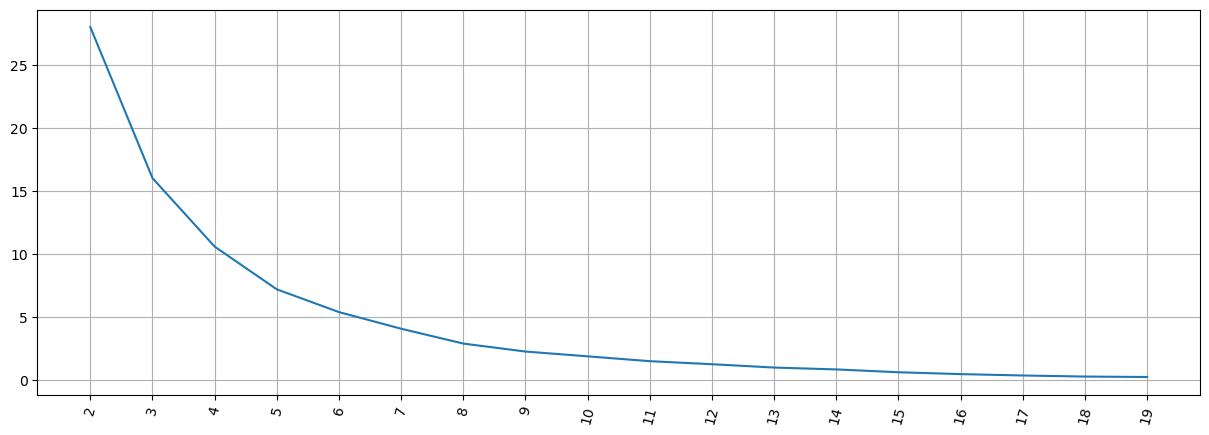

In [18]:
distorsions = []
max_loop=20
for k in range(2, max_loop):
    kmeans_test = KMeans(n_clusters=k)
    kmeans_test.fit(X)
    distorsions.append(kmeans_test.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

#### Silhouette score

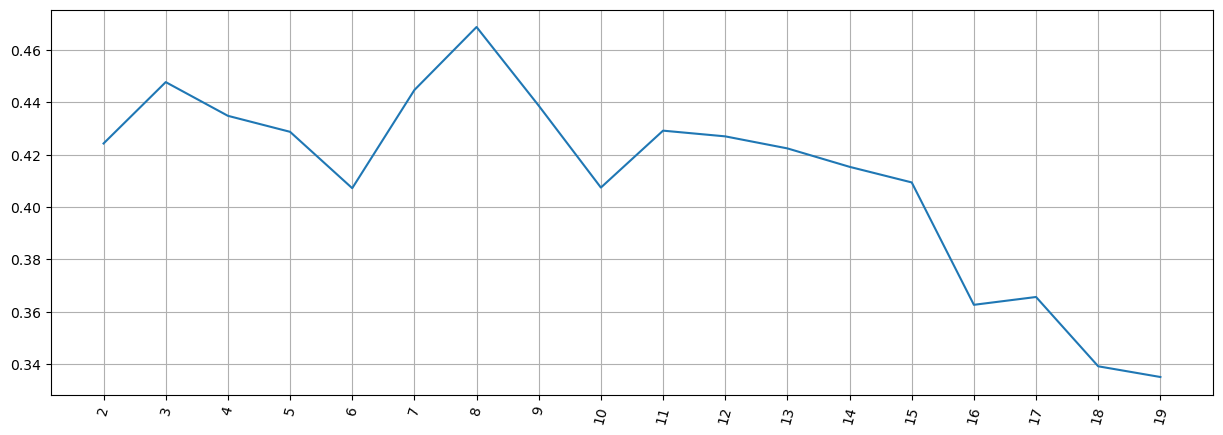

In [19]:
from sklearn import metrics

silhouette_score = []
for k in range(2, max_loop):
        kmeans_test = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans_test.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans_test.labels_, random_state=10))
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

From the first graph, Within Cluster SSE After K-Means Clustering, we can see that as the number of clusters increase pass 3, the sum of square of errors within clusters plateaus off. From the second graph, Silhouette Score After K-Means Clustering, we can see that there are various parts of the graph where a kink can be seen. Since there is not much a difference in SSE after 7 clusters and that the drop in sihouette score is quite significant between 14 clusters and 15 clusters, I would use 14 clusters in my K-Means model below.

In [20]:
k_means.labels_

array([5, 3, 2, 4, 4, 5, 3, 1, 0, 1, 3, 0, 1, 3, 5, 3, 5, 1, 0, 4, 1, 1,
       0, 0, 4, 1, 1, 0], dtype=int32)

<a id='5.1.2'></a>
### 5.1.2. Cluster Visualisation

Visualizing how your clusters are formed is no easy task when the number of variables/dimensions in your dataset is very large. One of the methods of visualising a cluster in two-dimensional space.

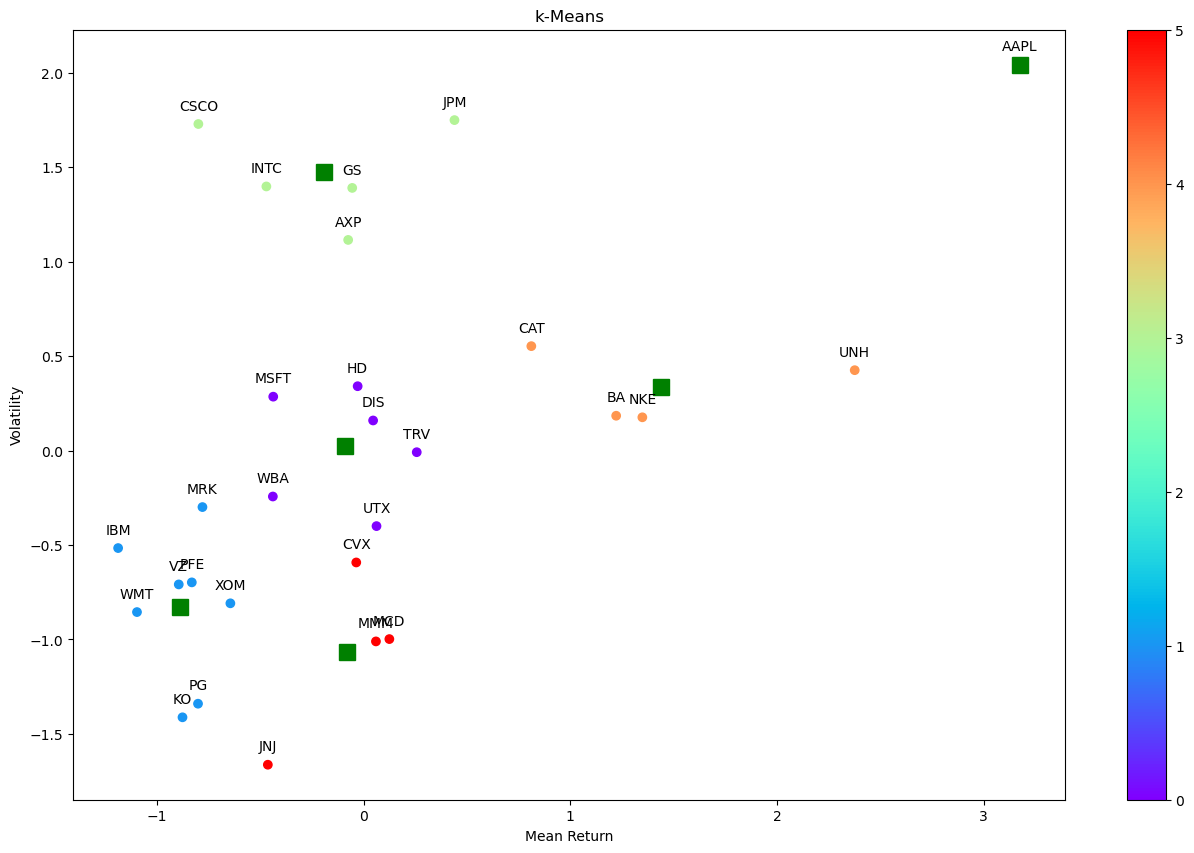

In [21]:
centroids = k_means.cluster_centers_
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c = k_means.labels_, cmap ="rainbow", label = X.index)
ax.set_title('k-Means')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

# zip joins x and y coordinates in pairs
for x,y,name in zip(X.iloc[:,0],X.iloc[:,1],X.index):

    label = name

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)

Checking Elements in each cluster 

In [22]:
cluster_label = pd.concat([pd.DataFrame(X.index), pd.DataFrame(k_means.labels_)],axis = 1)
cluster_label.columns =['Company','Cluster']
cluster_label.sort_values(by=['Cluster'])

,Company,Cluster
27,WBA,0
23,UTX,0
22,TRV,0
8,DIS,0
18,MSFT,0
11,HD,0
25,VZ,1
21,PG,1
20,PFE,1
7,KO,1


<a id='5.2'></a>
## 5.2. Hierarchical Clustering (Agglomerative Clustering)

Initially, each point is considered as a separate cluster, then it recursively clusters the points together depending upon the distance between them. The points are clustered in such a way that the distance between points within a cluster is minimum and distance between the cluster is maximum. Commonly used distance measures are Euclidean distance, Manhattan distance or Mahalanobis distance. Unlike k-means clustering, it is "bottom-up" approach.

Its primary advantage over other clustering methods is that you don't need to guess in advance how many clusters there might be. Agglomerate Clustering first assigns each data point into its own cluster, and gradually merges clusters until only one remains. It's then up to the user to choose a cutoff threshold and decide how many clusters are present.

Python Tip: Though providing the number of clusters is not necessary but Python provides an option of providing the same for easy and simple use.

While hierarchical clustering does not have hyperparameters like k-Means, the measure of dissimilarity between clusters (as opposed to individual data points) has an important impact on the clustering result. The options differ as follows:

- Single-link: distance between nearest neighbors of two clusters
- Complete link: maximum distance between respective cluster members
- Group average
- Ward’s method: minimize within-cluster variance


The use of a distance metric makes hierarchical clustering sensitive to scale:

In [23]:
nclust = 4
model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
clust_labels1 = model.fit_predict(X)

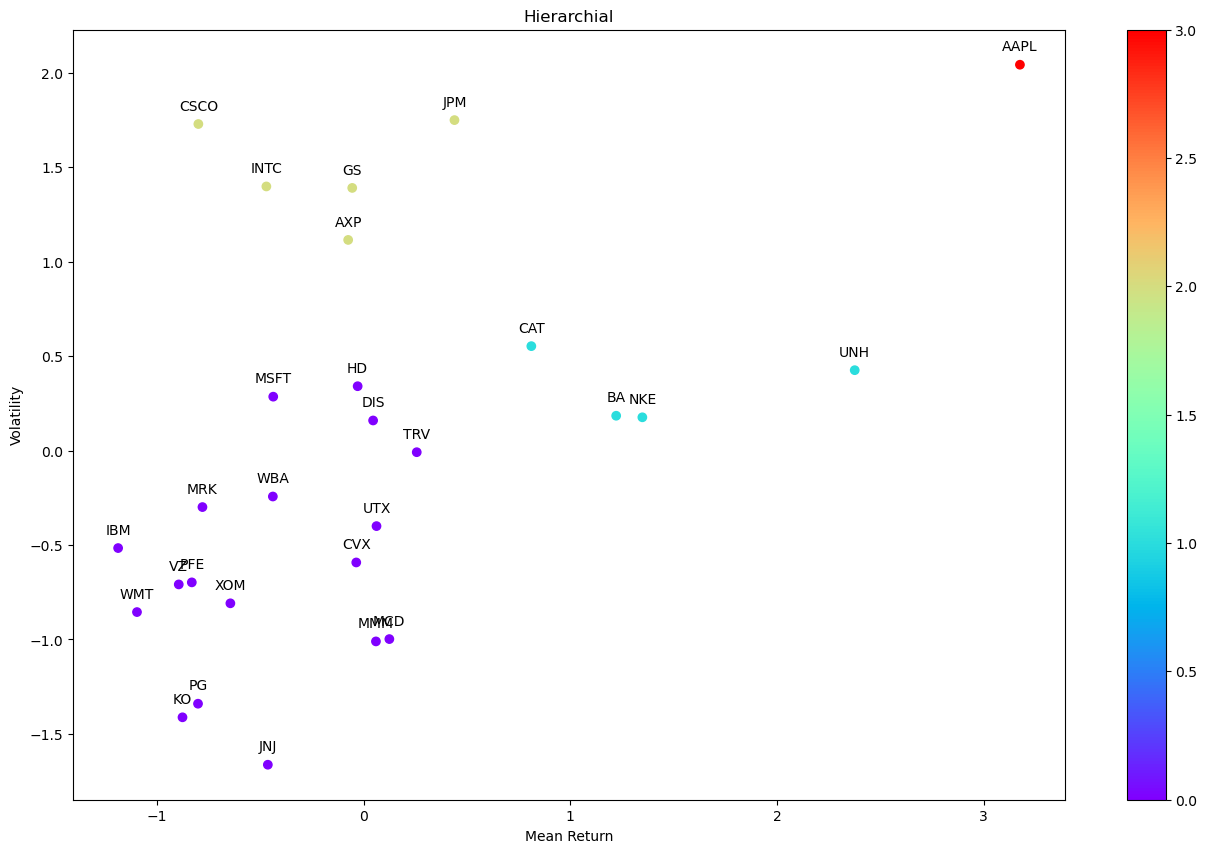

In [24]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c =clust_labels1, cmap ="rainbow")
ax.set_title('Hierarchial')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

# zip joins x and y coordinates in pairs
for x,y,name in zip(X.iloc[:,0],X.iloc[:,1],X.index):

    label = name

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

In this instance, the results between k-means and hierarchical clustering were pretty similar. This is not always the case, however. In general, the advantage of agglomerative hierarchical clustering is that it tends to produce more accurate results. The downside is that hierarchical clustering is more difficult to implement and more time/resource consuming than k-means.

<a id='5.2.1'></a>
### 5.2.1. Visualisation : Building Hierarchy Graph/ Dendogram


The next step is to look for clusters of correlations using the agglomerate hierarchical clustering technique. 
The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters.

Linkage does the actual clustering in one line of code, and returns a list of the clusters joined in the format: Z=[stock_1, stock_2, distance, sample_count]

There are also different options for the measurement of the distance. The option we will choose is the average distance measurement, but others are possible (ward, single, centroid, etc.).


In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

#Calulate linkage
Z= linkage(X, method='ward')
Z[0]

array([20.        , 25.        ,  0.06407423,  2.        ])

The best way to visualize an agglomerate clustering algorithm is through a dendogram, which displays a cluster tree, the leaves being the individual stocks and the root being the final single cluster. The "distance" between each cluster is shown on the y-axis, and thus the longer the branches are, the less correlated two clusters are.

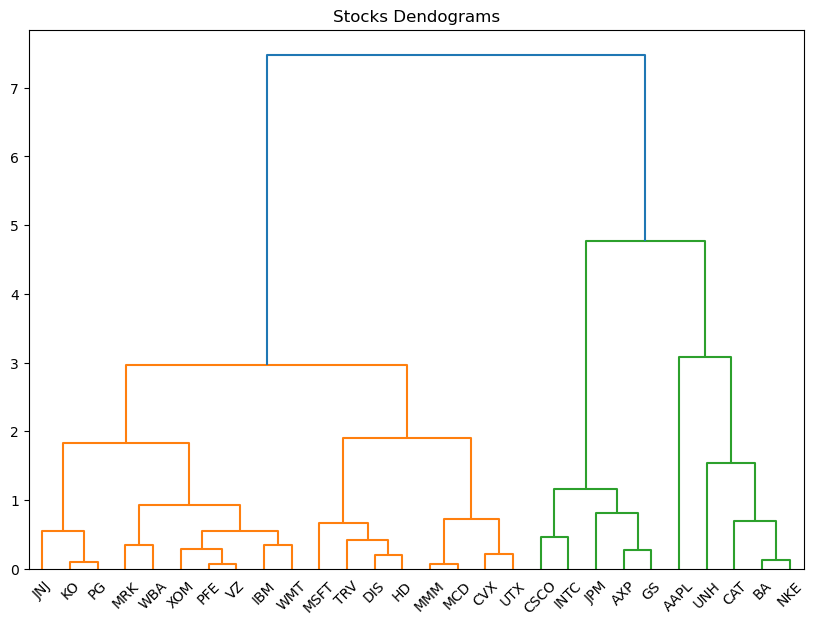

In [26]:
#Plot Dendogram
plt.figure(figsize=(10, 7))
plt.title("Stocks Dendograms")
dendrogram(Z,labels = X.index)
plt.show()

Once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to number of clusters.
Then we select the distance threshold to cut the dendrogram to obtain the selected clustering level. The output is the cluster labelled for each row of data. As expected from the dendrogram, a cut at 2.5 gives us 5 clusters.

In [27]:
distance_threshold = 2.5
clusters = fcluster(Z, distance_threshold, criterion='distance')
chosen_clusters = pd.DataFrame(data=clusters, columns=['cluster'])

chosen_clusters['cluster'].unique()
# array([4, 5, 2, 3, 1], dtype=int64)

array([2, 3, 5, 4, 1], dtype=int32)

#### Cophenetic Correlation coefficient

It's important to get a sense of how well the clustering performs. One measure is the Cophenetic Correlation Coefficient,  c . This compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer  c  is to 1, the better the clustering preserves the original distances. Generally  c  > 0.7 is consistered a good cluster fit. Of course, other accuracy checks are possible.

In [28]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import pylab
c, coph_dists = cophenet(Z, pdist(X))
c

0.6935580909376271

According to the dendogram above, the two most correlated stocks PAYX and ADP. First, does this intuitively make sense? Doing a quick look at PAYX and ADP, it seems like they are both in the business of taxes, payroll, HR, retirement and insurance. So it makes sense that they would be strongly correlated. Let's plot them below to visually see how well they correlate. In addition, let's pick two stocks that are not well correlated at all to compare to, say, NVDA and WDC.

<a id='5.2.2'></a>
### 5.2.2. Compare linkage types

Hierarchical clustering provides insight into degrees of similarity among observations as it continues to merge data. A significant change in the similarity metric from one merge to the next suggests a natural clustering existed prior to this point. The dendrogram visualizes the successive merges as a binary tree, displaying the individual data points as leaves and the final merge as the root of the tree. It also shows how the similarity monotonically decreases from bottom to top. Hence, it is natural to select a clustering by cutting the dendrogram.

The following figure illustrates the dendrogram for the classic Iris dataset with four classes and three features using the four different distance metrics introduced above. It evaluates the fit of the hierarchical clustering using the cophenetic correlation coefficient that compares the pairwise distances among points and the cluster similarity metric at which a pairwise merge occurred. A coefficient of 1 implies that closer points always merge earlier.

In [29]:
methods = ['single', 'complete', 'average', 'ward']
pairwise_distance = pdist(rescaledDataset)

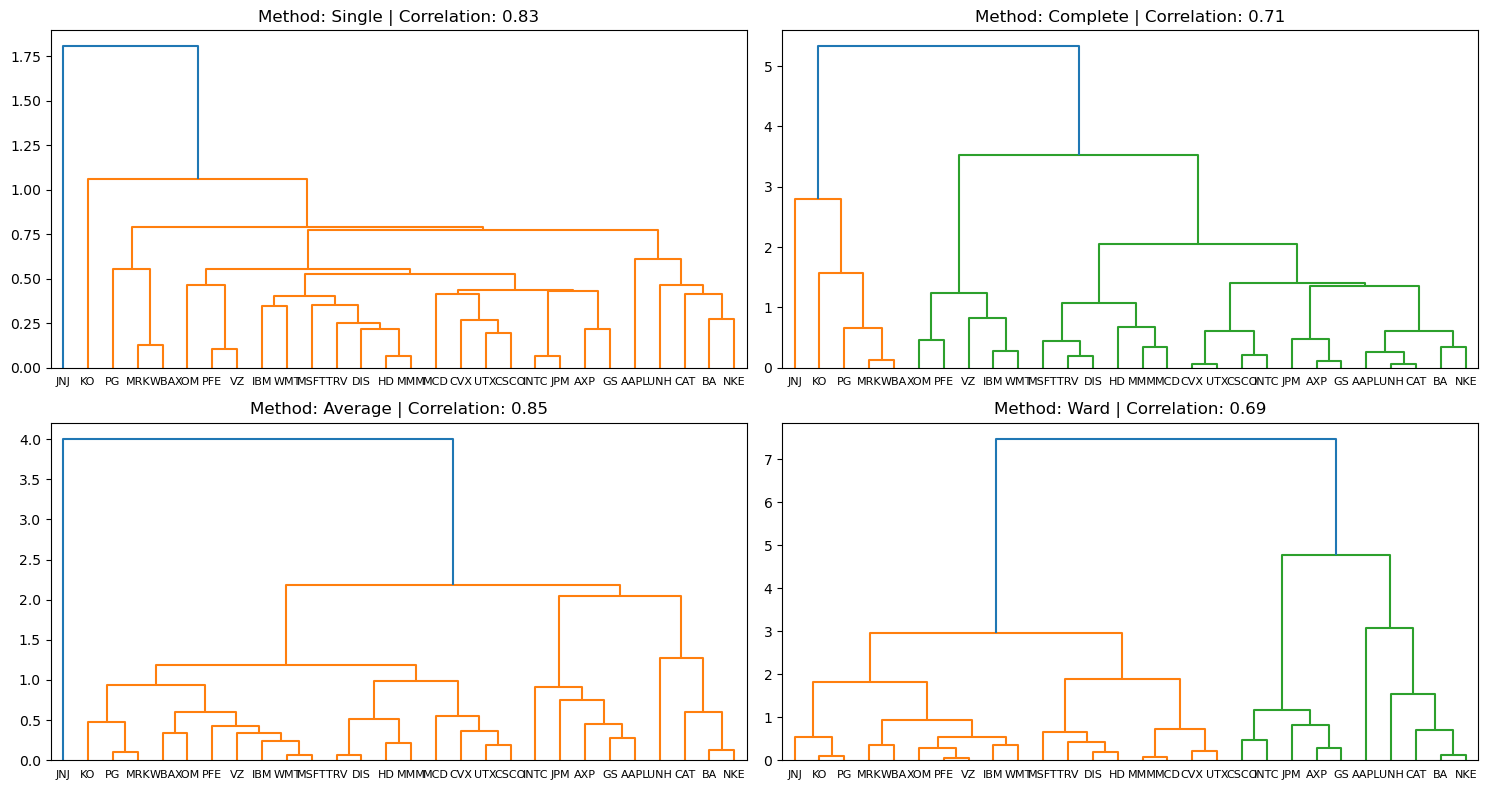

In [30]:
fig, axes = plt.subplots(figsize=(15, 8), nrows=2, ncols=2, sharex=True)
axes = axes.flatten()
for i, method in enumerate(methods):
    Z = linkage(X, method)
    c, coph_dists = cophenet(Z, pairwise_distance)
    dendrogram(Z, labels=X.index,
        orientation='top', leaf_rotation=0., 
        leaf_font_size=8., ax = axes[i])
    axes[i].set_title('Method: {} | Correlation: {:.2f}'.format(
                                                method.capitalize(), c))
    
fig.tight_layout()

Different linkage methods produce different dendrogram ‘looks’ so that we can not use this visualization to compare results across methods. In addition, the Ward method that minimizes the within-cluster variance may not properly reflect the change in variance but the total variance that may be misleading. Instead, other quality metrics like the cophenetic correlation or measures like inertia if aligned with the overall goal are more appropriate.


The strengths of hierarchical clustering include that:

* You do not need to specify the number of clusters but instead offers insight about potential clustering by means of an intuitive visualization.

* It produces a hierarchy of clusters that can serve as a taxonomy.

* It can be combined with k-means to reduce the number of items at the start of the agglomerative process.

The weaknesses include:

* The high cost in terms of computation and memory because of the numerous similarity matrix updates.

* Another downside is that all merges are final so that it does not achieve the global optimum. 

* Furthermore, the curse of dimensionality leads to difficulties with noisy, high-dimensional data.


<a id='5.3'></a>
## 5.3. Affinity Propagation

It does not require the number of cluster to be estimated and provided before starting the algorithm. It makes no assumption regarding the internal structure of the data points

The algorithm exchanges messages between pairs of data points until a set of exemplars emerges, with each exemplar corresponding to a cluster. The Affinity Propagation algorithm takes as input a real number s(k,k) for each data point k — referred to as a “preference”. Data points with large values for s(k,k) are more likely to be exemplars. The number of clusters is influenced by the preference values and the message-passing procedure.

In [31]:
ap = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
ap.fit(X)
clust_labels2 = ap.predict(X)

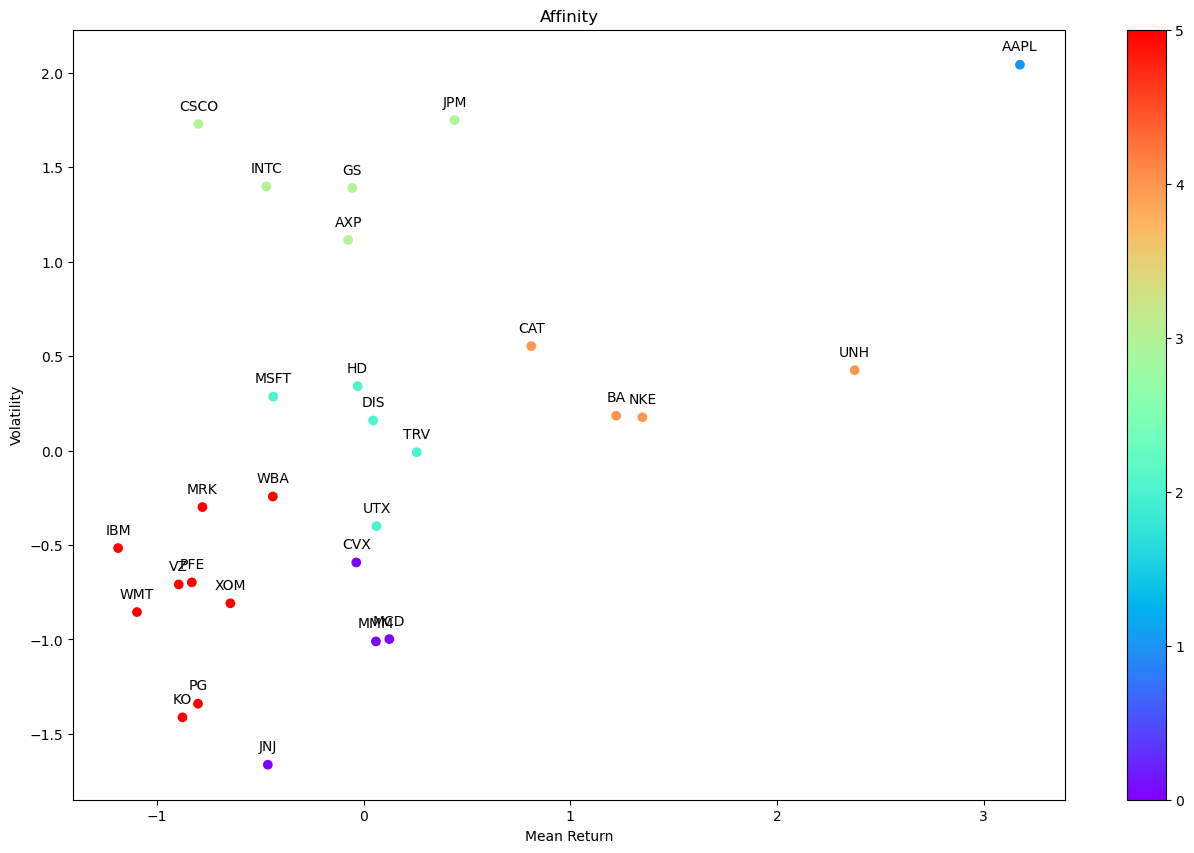

In [32]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c =clust_labels2, cmap ="rainbow")
ax.set_title('Affinity')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

# zip joins x and y coordinates in pairs
for x,y,name in zip(X.iloc[:,0],X.iloc[:,1],X.index):

    label = name

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

<a id='5.3.1'></a>
### 5.3.1 Cluster Visualisation

In [33]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
n_clusters_ = len(cluster_centers_indices)

Estimated number of clusters: 6


<Figure size 640x480 with 0 Axes>

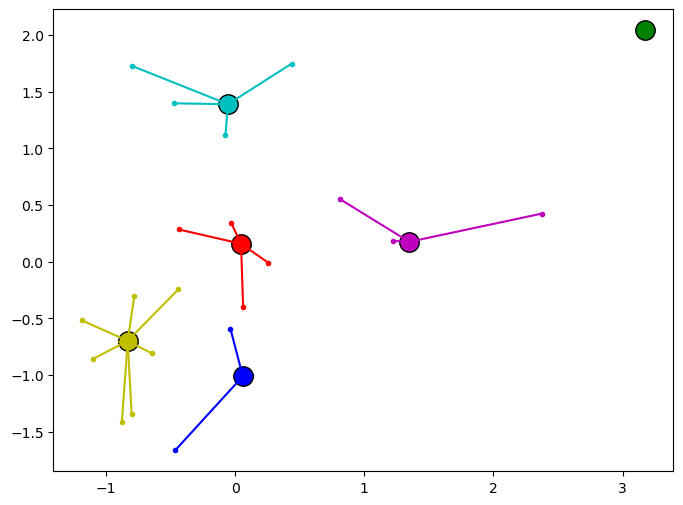

In [34]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
no_clusters = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % no_clusters)
# Plot exemplars

X_temp=np.asarray(X)
plt.close('all')
plt.figure(1)
plt.clf()

fig = plt.figure(figsize=(8,6))
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_temp[cluster_centers_indices[k]]
    plt.plot(X_temp[class_members, 0], X_temp[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in X_temp[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

In [35]:
cluster_label = pd.concat([pd.DataFrame(X.index), pd.DataFrame(ap.labels_)],axis = 1)
cluster_label.columns =['Company','Cluster']
cluster_label.sort_values(by=['Cluster'])

,Company,Cluster
0,MMM,0
5,CVX,0
16,MCD,0
14,JNJ,0
2,AAPL,1
23,UTX,2
22,TRV,2
18,MSFT,2
8,DIS,2
11,HD,2
